# DS 3000 - Assignment 10
**Student Name**: Regina Rabkina

**Date**: 11/12/23

## Part 1: 

Build a machine learning model to predict tip amount using the NYC Green Taxi Trip Records data for February 2020. Here is a link to the accompanying data dictionary. 

Data Source: https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet

1) load the data directly from the URL into a DataFrame.

In [1]:
#run this cell to install the fast parquet library
!pip install fastparquet

#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

#load the data into a dataframe
tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')
tripdata_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2020-02-01 00:10:25,2020-02-01 00:14:34,N,1.0,74,41,1.0,0.76,4.50,0.50,0.5,0.00,0.00,NaN,0.3,5.80,2.0,1.0,0.0
1,2,2020-02-01 00:16:59,2020-02-01 00:21:35,N,1.0,74,74,1.0,0.72,5.00,0.50,0.5,0.00,0.00,NaN,0.3,6.30,1.0,1.0,0.0
2,2,2020-02-01 00:19:31,2020-02-01 00:25:29,N,1.0,223,7,1.0,0.89,6.00,0.50,0.5,1.82,0.00,NaN,0.3,9.12,1.0,1.0,0.0
3,2,2020-02-01 00:43:52,2020-02-01 00:48:58,N,1.0,145,145,1.0,1.12,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.0,1.0,0.0
4,2,2020-02-01 00:32:53,2020-02-01 00:35:19,N,1.0,166,166,1.0,0.65,4.00,0.50,0.5,1.06,0.00,NaN,0.3,6.36,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398627,2,2020-02-29 23:51:00,2020-03-01 00:17:00,None,NaN,203,177,NaN,9.98,43.45,2.75,0.0,0.00,0.00,NaN,0.3,46.50,NaN,NaN,NaN
398628,2,2020-02-29 23:07:00,2020-02-29 23:20:00,None,NaN,91,71,NaN,2.48,17.94,2.75,0.0,0.00,0.00,NaN,0.3,20.99,NaN,NaN,NaN
398629,2,2020-02-29 23:48:00,2020-02-29 23:57:00,None,NaN,35,61,NaN,2.08,13.98,5.50,0.0,0.00,0.00,NaN,0.3,19.78,NaN,NaN,NaN
398630,2,2020-02-29 23:05:00,2020-02-29 23:33:00,None,NaN,157,217,NaN,4.20,31.05,2.75,0.0,0.00,0.00,NaN,0.3,34.10,NaN,NaN,NaN


## Part 2: 
Data preparation steps, EDA and visualizations.

In [2]:
#Inspect the dimensions
print("There are {} rows and {} columns in this data set.".format(tripdata_df.shape[0], tripdata_df.shape[1]))

#view samples of the data
tripdata_df.head()

#view information about the data
tripdata_df.info()

There are 398632 rows and 20 columns in this data set.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398632 entries, 0 to 398631
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               398632 non-null  int64         
 1   lpep_pickup_datetime   398632 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  398632 non-null  datetime64[ns]
 3   store_and_fwd_flag     317739 non-null  object        
 4   RatecodeID             317739 non-null  float64       
 5   PULocationID           398632 non-null  int64         
 6   DOLocationID           398632 non-null  int64         
 7   passenger_count        317739 non-null  float64       
 8   trip_distance          398632 non-null  float64       
 9   fare_amount            398632 non-null  float64       
 10  extra                  398632 non-null  float64       
 11  mta_tax                398632 non-null  float64  


1) In the February 2020 NYC Green Taxi Trip Records data, there are 398632 rows and 20 columns.

2) 
- Certain variables do not have suitable types. "passenger_count" is type float, when it should be type int, since you would typically display population as a whole number, as opposed to a decimal (you shouldn't have a fraction of a person).
- "store_and_fwd_flag" is listed as an object, when it should probably be listed as a string. The flag values depicted in the data dictionary, "Y" and "N", can be stored as strings since they are single-character indicators for whether it was a store and forward trip or not.
- "payment_type" is listed as a float, meanwhile it should be type int, as it is a numeric code ranging from whole numbers 1 to 6.
- "RatecodeID" is listed as a float, meanwhile it should be type int, as it is a numeric code ranging from whole numbers 1 to 6.
- "trip_type" is listed as a float, meanwhile it should be type int, as it is a numeric code indicating whether the trip was a street-hail (1) or a dispatch (2).

In [3]:
#check the frequency of null values in each column 
tripdata_df.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        80893
RatecodeID                80893
PULocationID                  0
DOLocationID                  0
passenger_count           80893
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                398632
improvement_surcharge         0
total_amount                  0
payment_type              80893
trip_type                 80894
congestion_surcharge      80893
dtype: int64

In [4]:
#count the frequency of missing values in each row
tripdata_df.isnull().sum(axis=1).sort_values(ascending = False)

398631    7
344706    7
344699    7
344700    7
344701    7
         ..
132875    1
132874    1
132873    1
132872    1
199316    1
Length: 398632, dtype: int64

The missing values are not isolated cases but are rather widespread, as they affect multiple columns in the dataset.

One column in particular, "ehail_fee", is empty throughout the entire data set (since there are 398632 entries, and this column is missing 398632 values). I would recommend deleting this column entirely, as all of its values are missing and may not provide any meaningful information.

There also seems to be about 80893 rows that are missing 7 column values (including ehail_fee), while it is not 50% of the data missing, it is a significant amount missing to repair, and the rows should be removed instead.

In [5]:
tripdata_df['improvement_surcharge'].value_counts(dropna=False)

 0.3    388804
 0.0      8701
-0.3      1127
Name: improvement_surcharge, dtype: int64

There is one isolated case of missing values in this column, so the missing values can be imputed with the most common value (0.3).

### Questionable Values

In [6]:
tripdata_df['VendorID'].value_counts(dropna=False)

2    345899
1     52704
6        29
Name: VendorID, dtype: int64

There are some values in the VendorID column that are not defined in the data dictionary (invalid value).

In [7]:
tripdata_df['mta_tax'].value_counts(dropna=False)

 0.50    320898
 0.00     76663
-0.50      1070
 3.55         1
Name: mta_tax, dtype: int64

In [8]:
tripdata_df['extra'].value_counts(dropna=False)

 0.00     167861
 0.50      82457
 2.75      78612
 1.00      61106
 5.50       3878
 3.25       1980
 3.75       1751
-0.50        356
 8.25        276
-1.00        197
 4.50        125
 0.63          5
-4.50          3
 0.80          2
 0.68          1
 1.02          1
 1.46          1
 1.25          1
 1.11          1
 1.20          1
 2.94          1
 1.22          1
 0.86          1
 2.22          1
 0.76          1
 1.80          1
 1.08          1
 1.03          1
 2.03          1
 1.07          1
 2.52          1
 16.74         1
 1.81          1
 8.23          1
 2.20          1
 14.26         1
 0.66          1
Name: extra, dtype: int64

### Data Preparation:
#### Missing/Null Values

In [9]:
#handle missing data -- deletion
# remove the entirely null column
tripdata_df = tripdata_df.drop(['ehail_fee'], axis=1)
tripdata_df.shape

(398632, 19)

Remove rows with 6 or more vissing values

In [10]:
tripdata_df = tripdata_df[tripdata_df.isnull().sum(axis=1) < 6]
tripdata_df.shape

(317739, 19)

Perform imputation on improvement_surcharge missing values

In [11]:
tripdata_df[tripdata_df['improvement_surcharge'].isna()] = 0.30
tripdata_df['improvement_surcharge'].value_counts(dropna=False)

 0.3    314074
 0.0      2549
-0.3      1116
Name: improvement_surcharge, dtype: int64

In [12]:
tripdata_df = tripdata_df.dropna(subset = ['trip_type'])

In [13]:
tripdata_df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

### Convert to Suitable Variable Types

In [14]:
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317738 entries, 0 to 317738
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               317738 non-null  float64
 1   lpep_pickup_datetime   317738 non-null  object 
 2   lpep_dropoff_datetime  317738 non-null  object 
 3   store_and_fwd_flag     317738 non-null  object 
 4   RatecodeID             317738 non-null  float64
 5   PULocationID           317738 non-null  float64
 6   DOLocationID           317738 non-null  float64
 7   passenger_count        317738 non-null  float64
 8   trip_distance          317738 non-null  float64
 9   fare_amount            317738 non-null  float64
 10  extra                  317738 non-null  float64
 11  mta_tax                317738 non-null  float64
 12  tip_amount             317738 non-null  float64
 13  tolls_amount           317738 non-null  float64
 14  improvement_surcharge  317738 non-nu

In [15]:
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype(int)
tripdata_df['VendorID'] = tripdata_df['VendorID'].astype(int)
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype(int)
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype(int)
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype(int)
tripdata_df["store_and_fwd_flag"] = tripdata_df["store_and_fwd_flag"].astype("string")

In [16]:
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317738 entries, 0 to 317738
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               317738 non-null  int64  
 1   lpep_pickup_datetime   317738 non-null  object 
 2   lpep_dropoff_datetime  317738 non-null  object 
 3   store_and_fwd_flag     317738 non-null  string 
 4   RatecodeID             317738 non-null  int64  
 5   PULocationID           317738 non-null  float64
 6   DOLocationID           317738 non-null  float64
 7   passenger_count        317738 non-null  int64  
 8   trip_distance          317738 non-null  float64
 9   fare_amount            317738 non-null  float64
 10  extra                  317738 non-null  float64
 11  mta_tax                317738 non-null  float64
 12  tip_amount             317738 non-null  float64
 13  tolls_amount           317738 non-null  float64
 14  improvement_surcharge  317738 non-nu

### Handling negative values

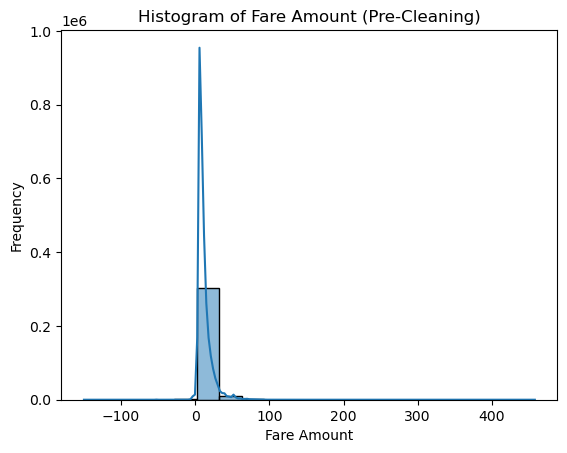

In [17]:
sns.histplot(tripdata_df['fare_amount'], bins=20, kde=True)
plt.title('Histogram of Fare Amount (Pre-Cleaning)')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

In [18]:
# count how many negative values are in dataset to see if any trends exist
negative_tip_count = (tripdata_df['tip_amount'] < 0).sum()
print(f'Number of negative tip amounts: {negative_tip_count}')

negative_fare_count = (tripdata_df['fare_amount'] < 0).sum()
print(f'Number of negative fare amounts: {negative_fare_count}')

negative_extra_count = (tripdata_df['extra'] < 0).sum()
print(f'Number of negative extra amounts: {negative_extra_count}')

Number of negative tip amounts: 22
Number of negative fare amounts: 1121
Number of negative extra amounts: 556


Since there are 317738 entries and only a very small fraction of them are negative values:

In [19]:
#replacing any negative values
tripdata_df.loc[tripdata_df["fare_amount"] < 0, "fare_amount"] = 0
tripdata_df.loc[tripdata_df["improvement_surcharge"] < 0, "improvement_surcharge"] = 0.3
tripdata_df.loc[tripdata_df["total_amount"] < 0, "total_amount"] = 0
tripdata_df.loc[tripdata_df["tip_amount"] < 0, "tip_amount"] = 0
tripdata_df.loc[tripdata_df["extra"] < 0, "extra"] = 0
tripdata_df.loc[tripdata_df["mta_tax"] < 0, "mta_tax"] = 0.5

tripdata_df = tripdata_df[tripdata_df['trip_distance'] > 0]

All the negative values are assigned to 0, besides "improvement_surcharge" and "mta_tax", since we are not dealing with any instances that could be negative. "improvement_surcharge" is set to 0.3, and "mta_tax" is 0.5, as that is defined in the data dictionary.

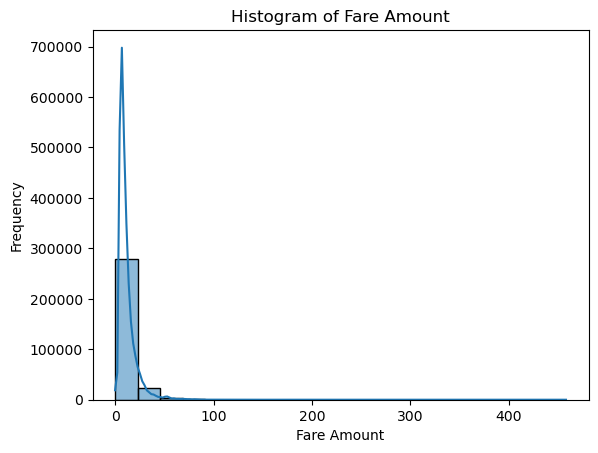

In [20]:
sns.histplot(tripdata_df['fare_amount'], bins=20, kde=True)
plt.title('Histogram of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

### Filtering out outlier trips

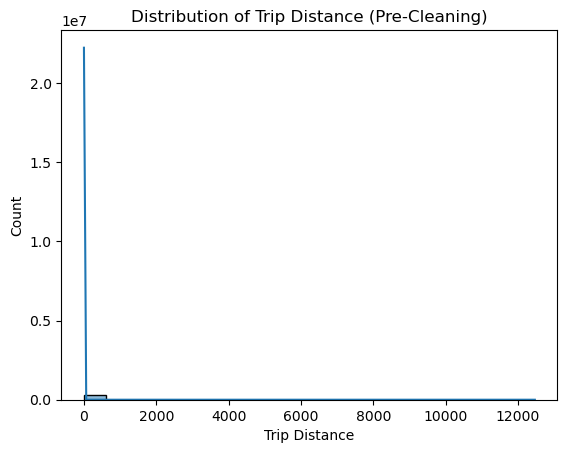

In [21]:
sns.histplot(tripdata_df['trip_distance'], bins=20, kde=True)
plt.title('Distribution of Trip Distance (Pre-Cleaning)')
plt.xlabel('Trip Distance')
plt.show()

It is evident that we have some outliers in the trip distances

In [22]:
#calculate the IQR for trip_distance
Q1 = tripdata_df['trip_distance'].quantile(0.25)
Q3 = tripdata_df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

#define the lower and upper bounds for filtering outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#filter out trips beyond the bounds
tripdata_df = tripdata_df[(tripdata_df['trip_distance'] >= lower_bound) & (tripdata_df['trip_distance'] <= upper_bound)]

#### Visualizing the distribution of trip distances

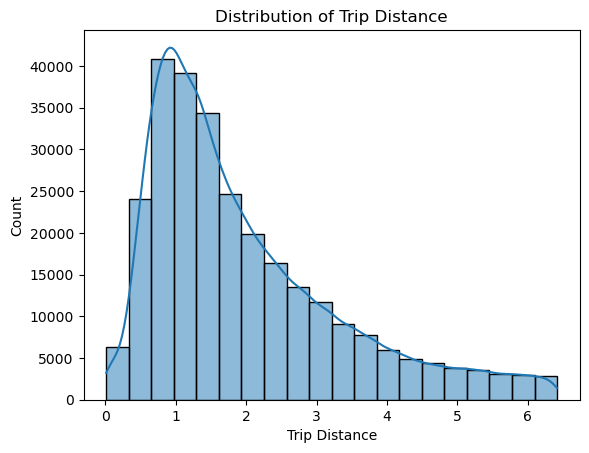

In [23]:
sns.histplot(tripdata_df['trip_distance'], bins=20, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.show()

By filtering the dataset based on these bounds, trips are retained within a reasonable range of distances, removing outliers that might skew the analysis.

## Part 3:
Selecting the required features to build the model and encoding categorical variables.

## Relevant Features:
1) passenger_count: The number of passengers in the taxi. It is reasonable to assume that the tip amount might be influenced by the number of passengers, as larger groups might be more inclined to tip higher.

2) trip_distance: The distance traveled during the taxi trip. Longer trips may result in a higher tip, as passengers might be more willing to tip for longer rides.

3) fare_amount: The base fare for the taxi trip. The fare amount serves as a fundamental factor influencing the total cost of the trip, and consequently, the tip amount.

4) extra: Extra charges applicable to the trip. This could include additional fees for specific conditions or services, and it may contribute to the overall cost and, subsequently, the tip.

5) mta_tax: MTA tax imposed on taxi trips. This is a fixed charge and might contribute to the total cost and, consequently, the tip amount.

6) tolls_amount: Tolls paid during the trip. Tolls represent an additional cost for the taxi ride, and passengers might factor this into their tipping decision.

7) improvement_surcharge: Similar to other surcharges, it contributes to the overall cost of the trip and may influence the tip.

8) congestion_surcharge: A surcharge related to congestion pricing. Like other surcharges, it adds to the total cost and may impact the tip amount.

9) payment_type: The method of payment used by the passenger. Different payment types might be associated with different tipping behaviors. For example, passengers paying with credit cards may tip differently than those paying in cash.

10) trip_type: Indicates whether the trip is a street-hail or dispatch trip. The nature of the trip may influence the passenger's perception and willingness to tip.

11) PULocationID and DOLocationID: Pickup and dropoff location IDs. The geographic location of the trip may influence tipping behavior, with certain areas potentially associated with higher or lower tips.

12) RatecodeID: RatecodeID represents the rate set for the trip (standard rate, JFK, Newark, etc.). Different rate codes might imply different trip characteristics or destinations, influencing the tip amount.


## Categorical Variables:

In [24]:
#encode the categorical features
categorical_columns = ['payment_type', 'trip_type', 'PULocationID', 'DOLocationID', 'RatecodeID']
tripdata_df_encoded = pd.get_dummies(tripdata_df, columns=categorical_columns, drop_first=True)

## Part 4:
Partitioning the prepared data into train/test sets.

In [25]:
#partition the data
#select relevant features based on the previous steps
selected_features = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
                     'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']


# Extract features and target variable
X = tripdata_df_encoded[selected_features] #input features
y = tripdata_df_encoded['tip_amount'] #target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                   )

In [26]:
#print the shape of the training and testing sets to verify
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (195417, 8) (195417,)
Test set shape: (83751, 8) (83751,)


## Part 5:
Building a machine learning model, using the Random Forest algorithm, that predicts the tip amount.

Since we will be predicting a continuous variable (the tip amount), we will perform regression, not classification.

In [27]:
#initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

#train the model on the training set
random_forest_model.fit(X_train, y_train)

#make predictions on the test set
predictions = random_forest_model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

#round the evaluation metrics to two decimal places
mse = round(mse, 2)
mae = round(mae, 2)
r2 = round(r2, 2)

#print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 7.86
Mean Absolute Error (MAE): 1.11
R-squared (R2): -0.02


## Part 6:
Evaluating the predictions from the model.

Mean Squared Error (MSE): 7.86
In this case, an MSE of 7.86 means, on average, the squared difference between predicted and actual tip amounts is 7.86. 

Mean Absolute Error (MAE): 1.11
An MAE of 1.11 indicates that, on average, the model's predictions are off by approximately $1.11 in tip amount. MAE is in the same unit as the target variable.

R-squared (R2): -0.02
A negative R-squared suggests that the model does not perform well and is worse than a model that simply predicts the mean of the target variable. R-squared can be negative when the model is a poor fit for the data.

Ultimately, the model's performance, based on these metrics, is not satisfactory.

## Part 7:
Reflecting on the model's prediction capability and tuning the model using the n_estimators parameter.


#### Based on the evaluation metrics, this model did not perform too well. 

In [28]:
#define a range of values for n_estimators to try
param_grid = {'n_estimators': [50, 100, 150]}

#instantiate the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

#create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

#fit the grid search to the data
grid_search.fit(X_train, y_train)

#get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']

#instantiate the Random Forest Regressor with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)

#train the model on the training set
best_rf_model.fit(X_train, y_train)

#make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

#evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

#round the evaluation metrics to two decimal places
mse_best = round(mse_best, 2)
mae_best = round(mae_best, 2)
r2_best = round(r2_best, 2)

#print the evaluation metrics for the best model
print(f'Best Model - Mean Squared Error: {mse_best}')
print(f'Best Model - Mean Absolute Error: {mae_best}')
print(f'Best Model - R-squared: {r2_best}')
print(f'Best Model - Number of Estimators: {best_n_estimators}')

Best Model - Mean Squared Error: 7.86
Best Model - Mean Absolute Error: 1.11
Best Model - R-squared: -0.01
Best Model - Number of Estimators: 150


Based on this set of n_estimators, it is clear that the tuning did not significantly improve the model's performance. The metrics for the best model are very similar to the initial model. We will try to tune this model with a range of hyperparameters.

In [29]:
#define a smaller set of values for hyperparameters to try
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#instantiate the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

#create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

#fit the grid search to the data
grid_search.fit(X_train, y_train)

#get the best hyperparameters
best_params = grid_search.best_params_

#instantiate the Random Forest Regressor with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

#train the model on the training set
best_rf_model.fit(X_train, y_train)

#make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

#evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

#round the evaluation metrics to two decimal places
mse_best = round(mse_best, 2)
mae_best = round(mae_best, 2)
r2_best = round(r2_best, 2)

#print the evaluation metrics and best hyperparameters
print(f'Best Model - Mean Squared Error: {mse_best}')
print(f'Best Model - Mean Absolute Error: {mae_best}')
print(f'Best Model - R-squared: {r2_best}')
print(f'Best Model - Best Hyperparameters: {best_params}')

Best Model - Mean Squared Error: 7.35
Best Model - Mean Absolute Error: 1.08
Best Model - R-squared: 0.05
Best Model - Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


The Mean Squared Error (MSE) has decreased from the initial model, and the R-squared value has moved from negative to positive, indicating some improvement in capturing the variance in the target variable. The Mean Absolute Error (MAE) is also slightly lower. 

Overall, the tuning process slightly improved the model's predictive capability.

## Part 8:
Reviewing which features were the most important when making the predictions.

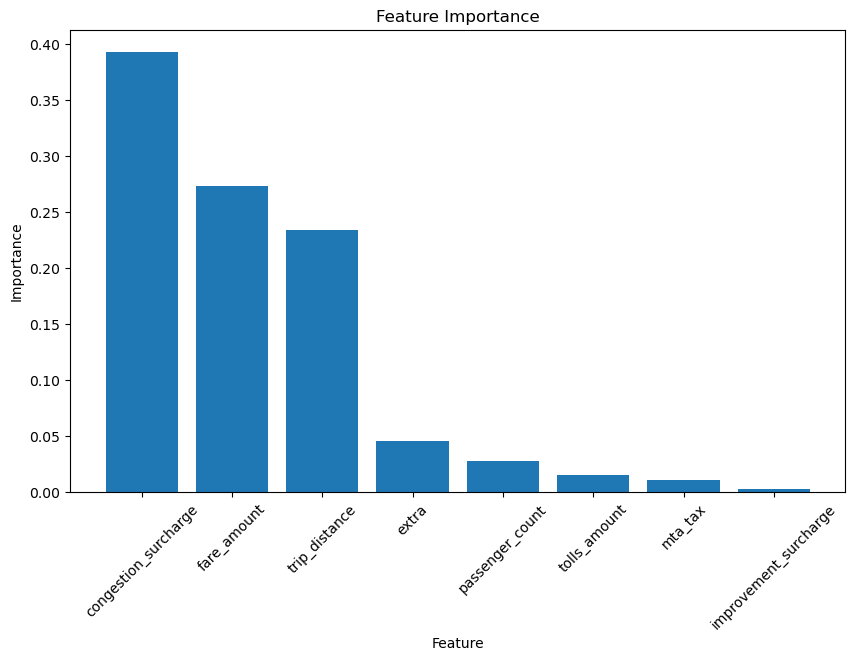

In [30]:
#get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

#get the names of the features
feature_names = X_train.columns

#sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

#plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

Looking at the top three bars, 

1) Congestion Surcharge: The high importance of this feature suggests that the presence or absence of a congestion surcharge significantly affects the predicted tip amount. It might be indicative of the impact of traffic conditions on tips.

2) Fare Amount: The fare amount is a crucial factor in determining the tip amount, which aligns with common intuition. Passengers are more likely to tip a higher amount when the fare itself is higher.

3) Trip Distance: The distance traveled during the trip is another important factor. Longer trips might lead to higher tip amounts, and this is reflected in the feature importance.